In [12]:
# Download coastlines shapefile from: https://www.ngdc.noaa.gov/mgg/shorelines/data/gshhg/latest/
# Cut the domain of interest from the full resolution shapefile

!ogr2ogr -f 'ESRI Shapefile' Downloads/gshhg-shp-2.3.7/GSHHS_shp/f/GSHHS_f_L1_SNE.shp Downloads/gshhg-shp-2.3.7/GSHHS_shp/f/GSHHS_f_L1.shp -clipsrc -74 -70 40 42

# or download and use: https://github.com/panmits86/masters_thesis/blob/master/SNE_shapefile.tar.gz

In [28]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.transforms import offset_copy
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pandas as pd

import gdal

%matplotlib inline

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(9, 13),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True, linestyle='--')
    gl.xlabels_top = gl.ylabels_right = False
    gl.xlocator = mticker.FixedLocator([-74, -73, -72, -71, -70])
    gl.ylocator = mticker.FixedLocator([40, 40.5, 41, 41.5, 42])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

In [29]:
buoys = pd.read_excel('Downloads/data/buoys/buoys.xlsx', header=0, index_col=None, usecols="C:E")
buoys.head()

,Buoys,Longitude,Latitude
0,44097,-71.127,40.969
1,44020,-70.279,41.493
2,44025,-73.164,40.251
3,44017,-72.049,40.693
4,44065,-73.703,40.369


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

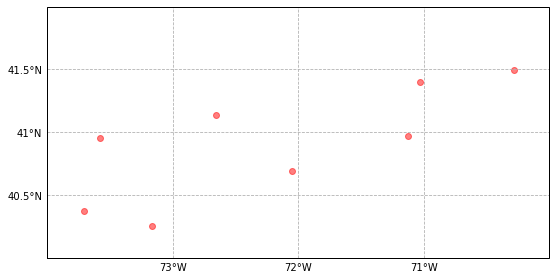

In [45]:
extent = [-74, -70, 40, 42]

fig, ax = make_map(projection=ccrs.PlateCarree())
ax.set_extent(extent)

# Add markers for the position of the buoys.
ax.scatter(buoys['Longitude'], buoys['Latitude'], marker='o', color='red',
             alpha=0.5, transform=ccrs.Geodetic())

geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=10)

ax.text(buoys['Longitude'], buoys['Longitude'], buoys['Buoys'],
             verticalalignment='center', horizontalalignment='left',
             transform=text_transform)

shp = shapereader.Reader('Downloads/gshhg-shp-2.3.7/GSHHS_shp/f/GSHHS_f_L1_SNE.shx')
for record, geometry in zip(shp.records(), shp.geometries()):
    ax.add_geometries([geometry], ccrs.PlateCarree(), facecolor='lightgray',
                      edgecolor='black')
    

plt.savefig('SNE1', dpi=300, format='png')

In [ ]:
# Add markers for the position of the buoys.
plt.plot(buoys['Longitude'], buoys['Latitude'], marker='o', color='red', markersize=8,
             alpha=0.7, transform=ccrs.Geodetic())

geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=10)

# Add text 15 pixels to the right of the buoys.
plt.text(buoys['Longitude'], buoys['Longitude'], buoys['Buoys'],
             verticalalignment='center', horizontalalignment='left',
             transform=text_transform,
             bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))

In [ ]:
# plt.scatter = ax.scatter ??